In [1]:
import pandas as pd
import geopandas as gpd
import descartes

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
confirmed_cases_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
recovered_cases_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
death_cases_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

In [3]:
#Load
df_confirmed=pd.read_csv(confirmed_cases_url)

In [4]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


In [5]:
df_confirmed.shape

(462, 61)

In [6]:
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20'],
      dtype='object')

In [7]:
confirm_df = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])

In [8]:
confirm_df.rename(columns={"variable": "Date","value":"Confirmed"},inplace=True)

In [9]:
confirm_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Thailand,15.0000,101.0000,1/22/20,2
1,NaN,Japan,36.0000,138.0000,1/22/20,2
2,NaN,Singapore,1.2833,103.8333,1/22/20,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0


In [10]:
confirm_df.shape

(26334, 6)

In [11]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
26329,Aruba,Netherlands,12.5186,-70.0358,3/18/20,4
26330,NaN,Zambia,-15.4167,28.2833,3/18/20,2
26331,NaN,Djibouti,11.8251,42.5903,3/18/20,1
26332,NaN,"Gambia, The",13.4432,-15.3101,3/18/20,1
26333,Montserrat,United Kingdom,16.7425,-62.1874,3/18/20,1


In [12]:
#function to fetch and rehape

def get_n_melt(data_url,case_type):
    df= pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={"variable": "Date","value":case_type},inplace=True)
    return melted_df

In [13]:
#fetch death or recovered
recovered_df = get_n_melt(recovered_cases_url,"Recovered")
death_df = get_n_melt(death_cases_url,"Deaths")

In [14]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,0
1,NaN,Japan,36.0000,138.0000,1/22/20,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0


In [15]:
recovered_df.shape

(26334, 6)

### merging or Joining ###

In [16]:
new_df = confirm_df.join(recovered_df["Recovered"])

In [17]:
new_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0


In [18]:
final_df = confirm_df.join(recovered_df["Recovered"]).join(death_df["Deaths"])

In [19]:
final_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0


In [20]:
final_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
26329,Aruba,Netherlands,12.5186,-70.0358,3/18/20,4,0,0
26330,NaN,Zambia,-15.4167,28.2833,3/18/20,2,0,0
26331,NaN,Djibouti,11.8251,42.5903,3/18/20,1,0,0
26332,NaN,"Gambia, The",13.4432,-15.3101,3/18/20,1,0,0
26333,Montserrat,United Kingdom,16.7425,-62.1874,3/18/20,1,0,0


In [21]:
# Save Data
final_df.to_csv("./data/coronovirus_updated_dataset.csv")

In [22]:
#Geospatial
gdf01= gpd.GeoDataFrame(final_df,geometry=gpd.points_from_xy(final_df["Long"],final_df["Lat"]))

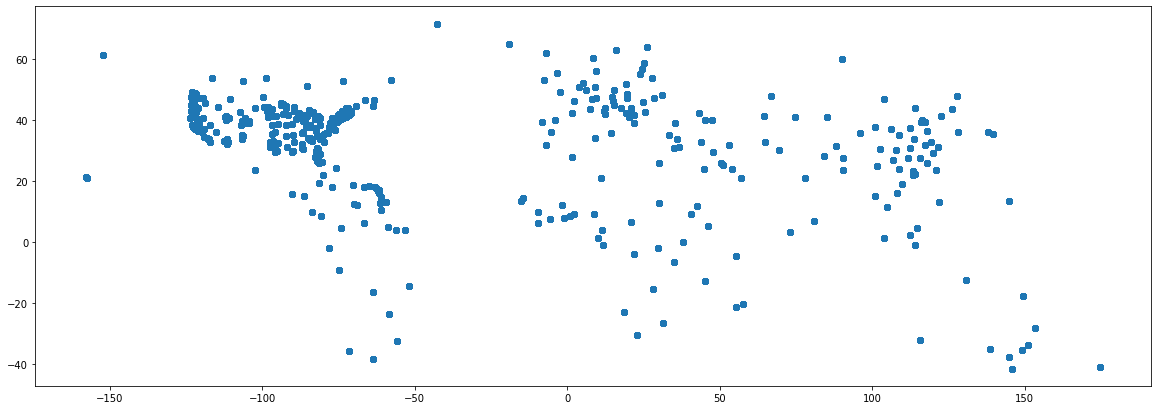

In [23]:
gdf01.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

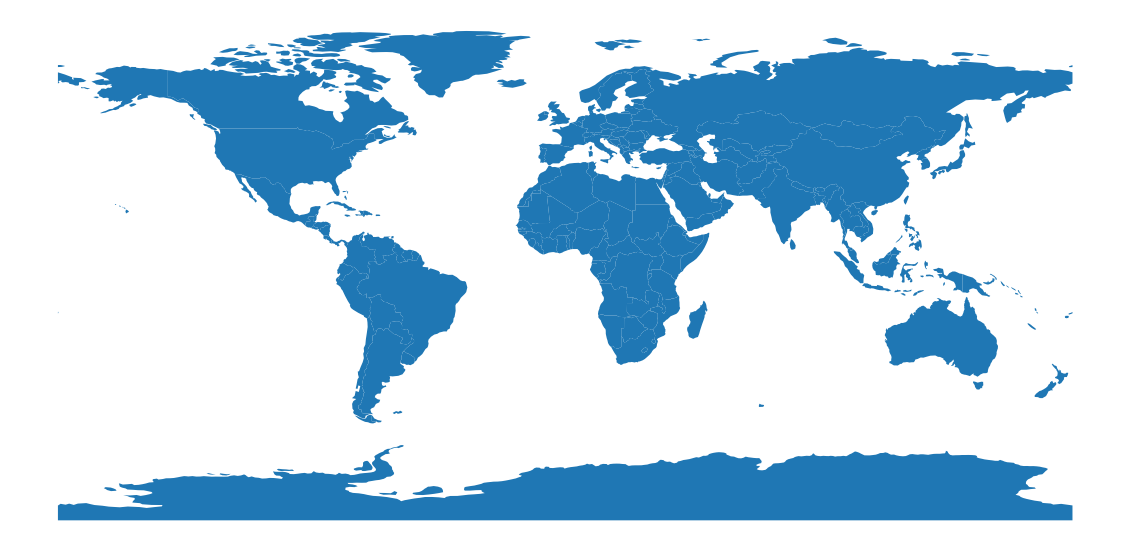

In [24]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

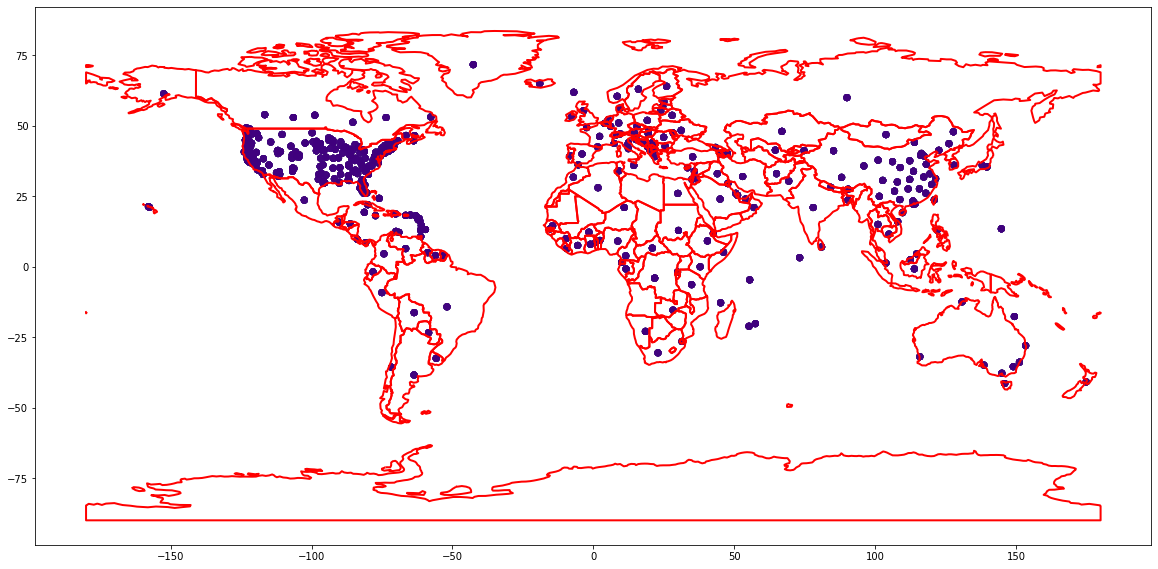

In [25]:
#overlap with data
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap="Purples",ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='r',linewidth=2,ax=ax)